Regression
===

Variance is a measure of how much a set of values are spread out.

Covariance is a measure of how much two variables change together.

The slope of the line of regression m = covariance / variance.

### Calculating Regression

In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pizza_diams = np.array([6, 8, 10, 14, 18])
pizza_price = np.array([7, 9, 13, 17.5, 18])

In [15]:
ave_diam = np.mean(pizza_diams)
ave_price = np.mean(pizza_price)

var = sum([(x - ave_diam)**2 for x in pizza_diams]) / (len(pizza_diams) - 1)
cov = sum([(x - ave_diam) * (pizza_price[ix] - ave_price) for ix, x in enumerate(pizza_diams)]) / (len(pizza_diams) - 1)

#var = np.var(pizza_diams, ddof=1)
#cov = np.cov(pizza_price, ddof=1)

m = cov / var
b = ave_price - m * ave_diam

print("Variance: ", var)
print("Covariance: ", cov)
print("Slope: ", m)
print("Y-Intercept: ", b)

Variance:  23.2
Covariance:  22.65
Slope:  0.976293103448
Y-Intercept:  1.96551724138


/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


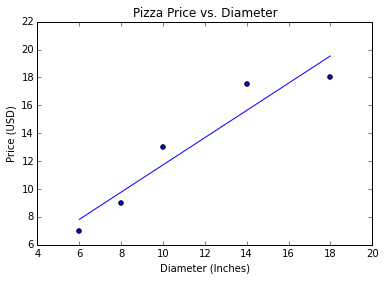

In [32]:
plt.scatter(pizza_diams, pizza_price)
plt.plot(pizza_diams, m * pizza_diams + b)
plt.xlabel('Diameter (Inches)')
plt.ylabel('Price (USD)')
plt.title('Pizza Price vs. Diameter')

In [35]:
from sklearn.linear_model import LinearRegression

diams_matrix = pizza_diams.reshape(5, 1)
price_matrix = pizza_price.reshape(5, 1)

rgm = LinearRegression()
rgm.fit(diams_matrix, price_matrix)

print(rgm.coef_, rgm.intercept_)

[[ 0.9762931]] [ 1.96551724]


### Regression Error

- Mean absolute error
- Mean squared error
- r-squared : the proportion of the variance in the response variable that is explained by the model
- Pearson correlation

In [46]:
rgm.score(diams_matrix, price_matrix)
X_test = np.array([8, 9, 11, 16, 12]).reshape(5, 1)
Y_test = np.array([11, 8.5, 15, 18, 11]).reshape(5, 1)
rgm.score(X_test, Y_test)

0.6620052929422553

In [41]:
pizza_features = np.array([[6, 2], [8, 1], [10, 0], [14, 2], [1, 0]])
trgm = LinearRegression()
trgm.fit(pizza_features, price_matrix)
tpvals = trgm.predict(pizza_features)
tpvals

array([[ 10.24086837],
       [ 12.95106823],
       [ 15.66126809],
       [ 12.28359752],
       [ 13.36319779]])

In [47]:
tX_test = np.array([[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]])
trgm.score(tX_test, Y_test)

-1.0022788338919426

Boston Housing
===

In [120]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split, cross_val_predict

In [105]:
b = load_boston()

train, test, train_target, test_target = train_test_split(b.data, b.target)

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [106]:
brgm = LinearRegression()
brgm.fit(train, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
# This is multidimensional data, so plotting it isn't going to work quite right.
# We can, however, print out some important values
test_pred = brgm.predict(test)

print("Slopes: ", brgm.coef_)
print("Intercept: ", brgm.intercept_)
print("Score: ", brgm.score(test, test_target))

Slopes:  [ -1.24522374e-01   4.84397953e-02   4.19910863e-02   2.38151830e+00
  -1.90437075e+01   4.15640625e+00   1.67762201e-03  -1.46487931e+00
   2.94414752e-01  -9.58052377e-03  -1.00545090e+00   1.13094478e-02
  -5.06213074e-01]
Intercept:  33.7246942254
Score:  0.719269069212
